# Word Length Filter

In [17]:
import pandas as pd
import re
from nltk.corpus import stopwords
import pickle
import time
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load Tweets
tweets = pd.read_pickle('tweet_length_sample.pkl')
tweets = tweets[0:10000]

In [4]:
# stopwords = pickle.load(open('stopwords.pkl', 'rb'))
# cleanedDocs = []
# word_len = []
# for tweet in tweets.tweet:
#     tempwordlist = []
#     for word in re.split('\.|\,|\n| ', tweet):
#         if "@" not in word.lower() and word.lower() not in stopwords and len(word)>3 and 'http' not in word and 'co' not in word and '#' not in word:
#             tempwordlist.append(word)
#     cleanedDocs.append(" ".join(tempwordlist))
#     word_len.append(len(" ".join(tempwordlist).split()))
# tweets['word_len'] = word_len

# tweets = tweets[tweets.word_len > 15]
# tweets.drop('word_len', axis = 1)

In [8]:
#All in one function.  Here, the input n, is the minimum length of the meaningful words that should be preserved
def LongTweetsOnly(tweets, n):
    stopwords = pickle.load(open('stopwords.pkl', 'rb'))
    cleanedDocs = []
    word_len = []
    for tweet in tweets.tweet:
        tempwordlist = []
        for word in re.split('\.|\,|\n| ', tweet):
            if "@" not in word.lower() and word.lower() not in stopwords and len(word)>3 and 'http' not in word and 'co' not in word and '#' not in word:
                tempwordlist.append(word)
        cleanedDocs.append(" ".join(tempwordlist))
        word_len.append(len(" ".join(tempwordlist).split()))
    tweets['word_len'] = word_len
    tweets = tweets[tweets.word_len > n]
    tweets.drop('word_len', axis = 1)
    
    return(tweets)

In [6]:
#Test the function to see how long it takes to run
start = time.time()
X = LongTweetsOnly(tweets)
end = time.time()

print (end - start) / 60.0

0.0272076010704


In [9]:
#Discover the distribtion of length of meainingful words in a sample of tweets
num_of_tweets = []
for length in range(15):
    X = LongTweetsOnly(tweets, length)
    num_of_tweets.append((len(X), length))

num_of_tweets = pd.DataFrame(num_of_tweets, columns = ['number of tweets', 'length of tweet'])

fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(num_of_tweets)
plt.title('Number of Tweets by Meaningful Word Count', size = 20)
plt.xlabel('Number of Meaningful Words', size = 15)
plt.ylabel('Number of Tweets \n n = 10,000', size = 15)

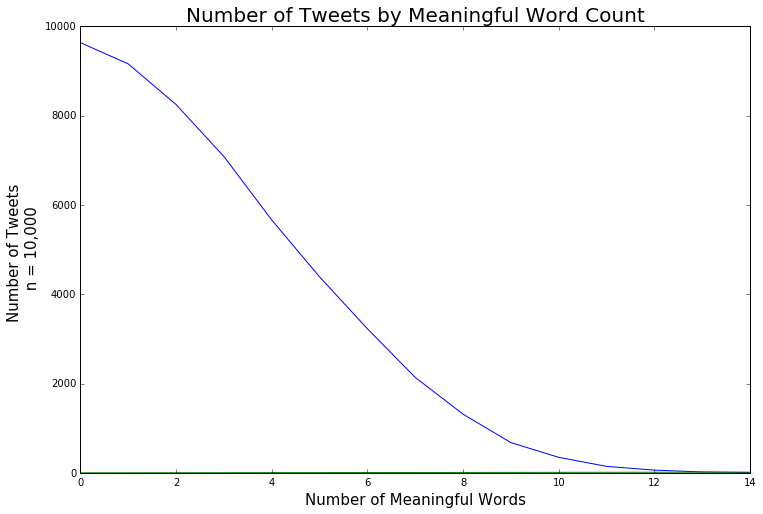